# **Data Understanding**

In [22]:
import pandas as pd
file_path = "/content/drive/MyDrive/Customer Loyalty/TopicAorganics.xlsx"
df = pd.read_excel(file_path)
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [23]:
df = df.drop(columns=['DemCluster', 'TargetAmt'])

In [24]:
df.columns

Index(['ID', 'DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender', 'DemReg',
       'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetBuy'],
      dtype='object')

In [25]:
df.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,868,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,1120,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,2313,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   PromClass        22223 non-null  object 
 8   PromSpend        22223 non-null  float64
 9   PromTime         21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [27]:
df.describe(include='all')

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
count,2.222300e+04,21138.000000,20715.000000,21549,19711,21758,21758,22223,22223.000000,21942.000000,22223.000000
unique,NaN,NaN,NaN,7,3,5,13,4,NaN,NaN,NaN
top,NaN,NaN,NaN,C,F,South East,London,Silver,NaN,NaN,NaN
freq,NaN,NaN,NaN,4566,12149,8634,6189,8572,NaN,NaN,NaN
mean,2.605540e+07,8.711893,53.797152,NaN,NaN,NaN,NaN,NaN,4420.590041,6.564670,0.247716
std,1.507497e+07,3.421125,13.206048,NaN,NaN,NaN,NaN,NaN,7559.047522,4.657113,0.431696
min,1.400000e+02,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,0.010000,0.000000,0.000000
25%,1.169402e+07,6.000000,44.000000,NaN,NaN,NaN,NaN,NaN,0.010000,4.000000,0.000000
50%,2.874879e+07,8.000000,54.000000,NaN,NaN,NaN,NaN,NaN,2000.000000,5.000000,0.000000
75%,3.745402e+07,11.000000,64.000000,NaN,NaN,NaN,NaN,NaN,6000.000000,8.000000,0.000000


In [28]:
df.isnull().sum()

,0
ID,0
DemAffl,1085
DemAge,1508
DemClusterGroup,674
DemGender,2512
DemReg,465
DemTVReg,465
PromClass,0
PromSpend,0
PromTime,281


In [29]:
missing_table = df.isnull().sum().reset_index()
missing_table.columns = ['Column', 'MissingValues']
missing_table['MissingPercentage'] = 100 * missing_table['MissingValues'] / len(df)
missing_table

,Column,MissingValues,MissingPercentage
0,ID,0,0.000000
1,DemAffl,1085,4.882329
2,DemAge,1508,6.785762
3,DemClusterGroup,674,3.032894
4,DemGender,2512,11.303604
5,DemReg,465,2.092427
6,DemTVReg,465,2.092427
7,PromClass,0,0.000000
8,PromSpend,0,0.000000
9,PromTime,281,1.264456


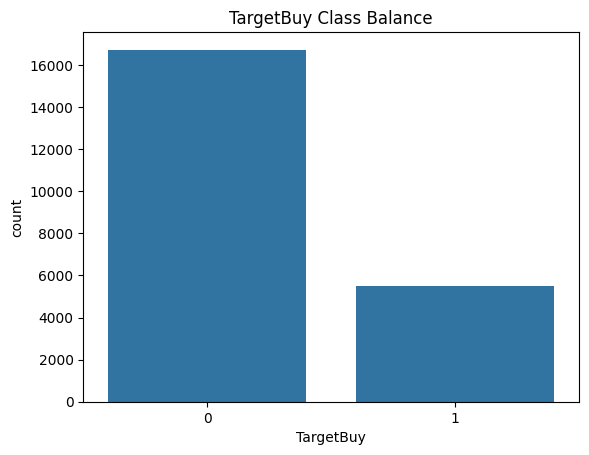

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TargetBuy', data=df)
plt.title('TargetBuy Class Balance')
plt.show()

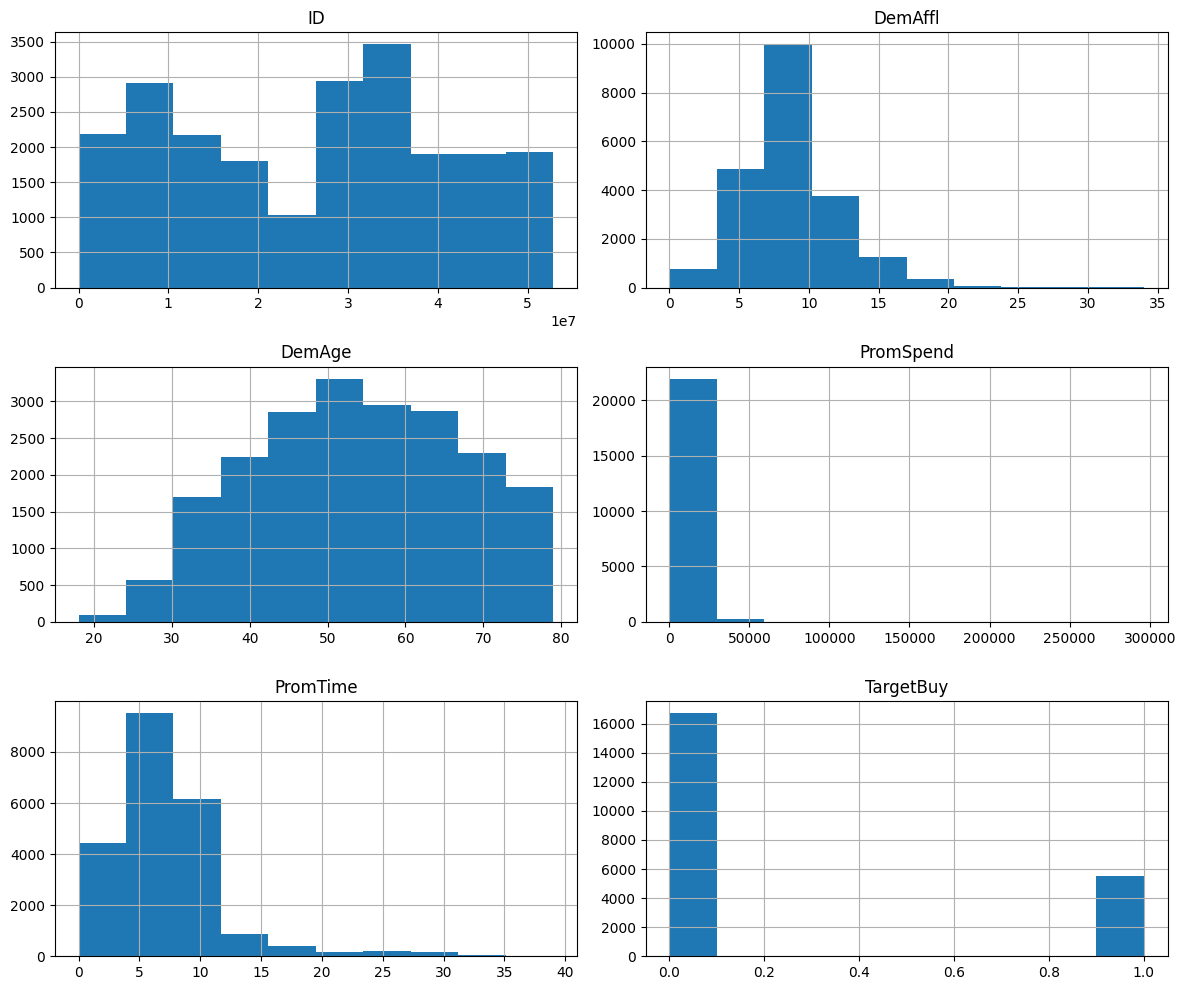

In [31]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [32]:
categorical_cols = ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']
for col in categorical_cols:
    print(df[col].value_counts(dropna=False))
    print()

DemClusterGroup
C      4566
D      4378
B      4144
F      3949
E      2608
A      1850
NaN     674
U        54
Name: count, dtype: int64

DemGender
F      12149
M       5815
NaN     2512
U       1747
Name: count, dtype: int64

DemReg
South East    8634
Midlands      6741
North         4324
Scottish      1368
South West     691
NaN            465
Name: count, dtype: int64

DemTVReg
London          6189
Midlands        3123
S & S East      2445
N West          2096
Wales & West    1703
East            1649
Yorkshire       1443
C Scotland       836
N East           785
S West           691
NaN              465
N Scot           329
Ulster           266
Border           203
Name: count, dtype: int64

PromClass
Silver      8572
Tin         6487
Gold        6324
Platinum     840
Name: count, dtype: int64



#**Data Preparation**

In [33]:
# Define columns
numeric_cols = ['DemAffl', 'DemAge', 'PromSpend', 'PromTime']
categorical_cols = ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']

# Impute numeric with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical with 'Unknown'
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [34]:
df.isnull().sum()

,0
ID,0
DemAffl,0
DemAge,0
DemClusterGroup,0
DemGender,0
DemReg,0
DemTVReg,0
PromClass,0
PromSpend,0
PromTime,0


In [35]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [36]:
df_encoded.head()

,ID,DemAffl,DemAge,PromSpend,PromTime,TargetBuy,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,...,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Ulster,DemTVReg_Unknown,DemTVReg_Wales & West,DemTVReg_Yorkshire,PromClass_Gold,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,140,10.0,76.0,16000.00,4.0,0,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1,620,4.0,49.0,6000.00,5.0,0,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
2,868,5.0,70.0,0.02,8.0,1,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
3,1120,10.0,65.0,0.01,7.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2313,11.0,68.0,0.01,8.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [38]:
df_encoded[numeric_cols].describe()

,DemAffl,DemAge,PromSpend,PromTime
count,2.222300e+04,2.222300e+04,2.222300e+04,2.222300e+04
mean,2.621811e-17,-1.374852e-17,4.987835e-17,-7.321887e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-2.597937e+00,-2.808720e+00,-5.848196e-01,-1.413347e+00
25%,-8.015353e-01,-6.910573e-01,-5.848196e-01,-5.495598e-01
50%,-2.027348e-01,1.483018e-02,-3.202314e-01,-3.336131e-01
75%,3.960657e-01,7.207177e-01,2.089477e-01,3.142271e-01
max,7.581672e+00,1.975629e+00,3.861595e+01,7.008576e+00


In [39]:
X = df_encoded.drop(columns=['ID', 'TargetBuy'])
y = df_encoded['TargetBuy']

In [40]:
X.shape, y.shape

((22223, 40), (22223,))

In [41]:
from sklearn.model_selection import train_test_split

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=12345
)

# Split temp 30% into 20% val, 10% test (2:1 ratio)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=12345
)

In [42]:
print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")

print("\nTarget distribution:")
print(f"Train: {y_train.mean():.2f}")
print(f"Validation: {y_val.mean():.2f}")
print(f"Test: {y_test.mean():.2f}")

Train: (15556, 40)
Validation: (4444, 40)
Test: (2223, 40)

Target distribution:
Train: 0.25
Validation: 0.25
Test: 0.25


#**Modeling**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [44]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=12345
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=12345)

In [45]:
lr_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=12345
)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=12345)

In [46]:
nn_model = MLPClassifier(
    hidden_layer_sizes=(16,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=12345
)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=300, random_state=12345)

In [47]:
ensemble_model = VotingClassifier(
    estimators=[
        ('DecisionTree', dt_model),
        ('LogisticRegression', lr_model),
        ('NeuralNetwork', nn_model)
    ],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=12345)),
                             ('LogisticRegression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=12345)),
                             ('NeuralNetwork',
                              MLPClassifier(hidden_layer_sizes=(16,),
                                            max_iter=300,
                                            random_state=12345))],
                 voting='soft')

# **Evaluation & Model Comparison**

In [48]:
models = {
    'Decision Tree': dt_model,
    'Logistic Regression': lr_model,
    'Neural Network': nn_model,
    'Ensemble': ensemble_model
}

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

results = []

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    print(f"Model: {name}")
    print(f"  Accuracy: {acc:.3f}")
    print(f"  AUC: {auc:.3f}")
    print(f"  F1-score: {f1:.3f}")
    print(f"  Confusion Matrix:\n{cm}")
    print()

    results.append({
        'Model': name,
        'Accuracy': acc,
        'AUC': auc,
        'F1-score': f1
    })

Model: Decision Tree
  Accuracy: 0.811
  AUC: 0.817
  F1-score: 0.521
  Confusion Matrix:
[[3150  193]
 [ 645  456]]

Model: Logistic Regression
  Accuracy: 0.806
  AUC: 0.803
  F1-score: 0.487
  Confusion Matrix:
[[3174  169]
 [ 692  409]]

Model: Neural Network
  Accuracy: 0.804
  AUC: 0.807
  F1-score: 0.503
  Confusion Matrix:
[[3136  207]
 [ 662  439]]

Model: Ensemble
  Accuracy: 0.811
  AUC: 0.817
  F1-score: 0.514
  Confusion Matrix:
[[3157  186]
 [ 656  445]]



In [50]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,AUC,F1-score
0,Decision Tree,0.811431,0.817062,0.521143
1,Logistic Regression,0.806256,0.802678,0.487195
2,Neural Network,0.804455,0.806901,0.502576
3,Ensemble,0.810531,0.817096,0.513857


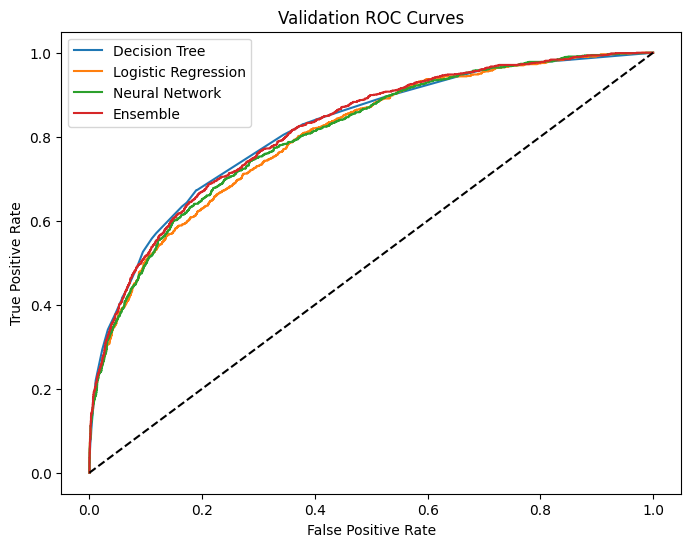

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curves')
plt.legend()
plt.show()

In [54]:
importances = dt_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
1,DemAge,0.474380
0,DemAffl,0.349350
12,DemGender_F,0.157766
13,DemGender_M,0.011838
2,PromSpend,0.003461
34,DemTVReg_Wales & West,0.000976
33,DemTVReg_Unknown,0.000921
24,DemTVReg_East,0.000805
22,DemTVReg_Border,0.000502
7,DemClusterGroup_D,0.000000
